<a href="https://colab.research.google.com/github/yanghan8458/practice/blob/main/pra2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch torchvision torchaudio

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

<ipython-input-2-bd9b455285ab>:36: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


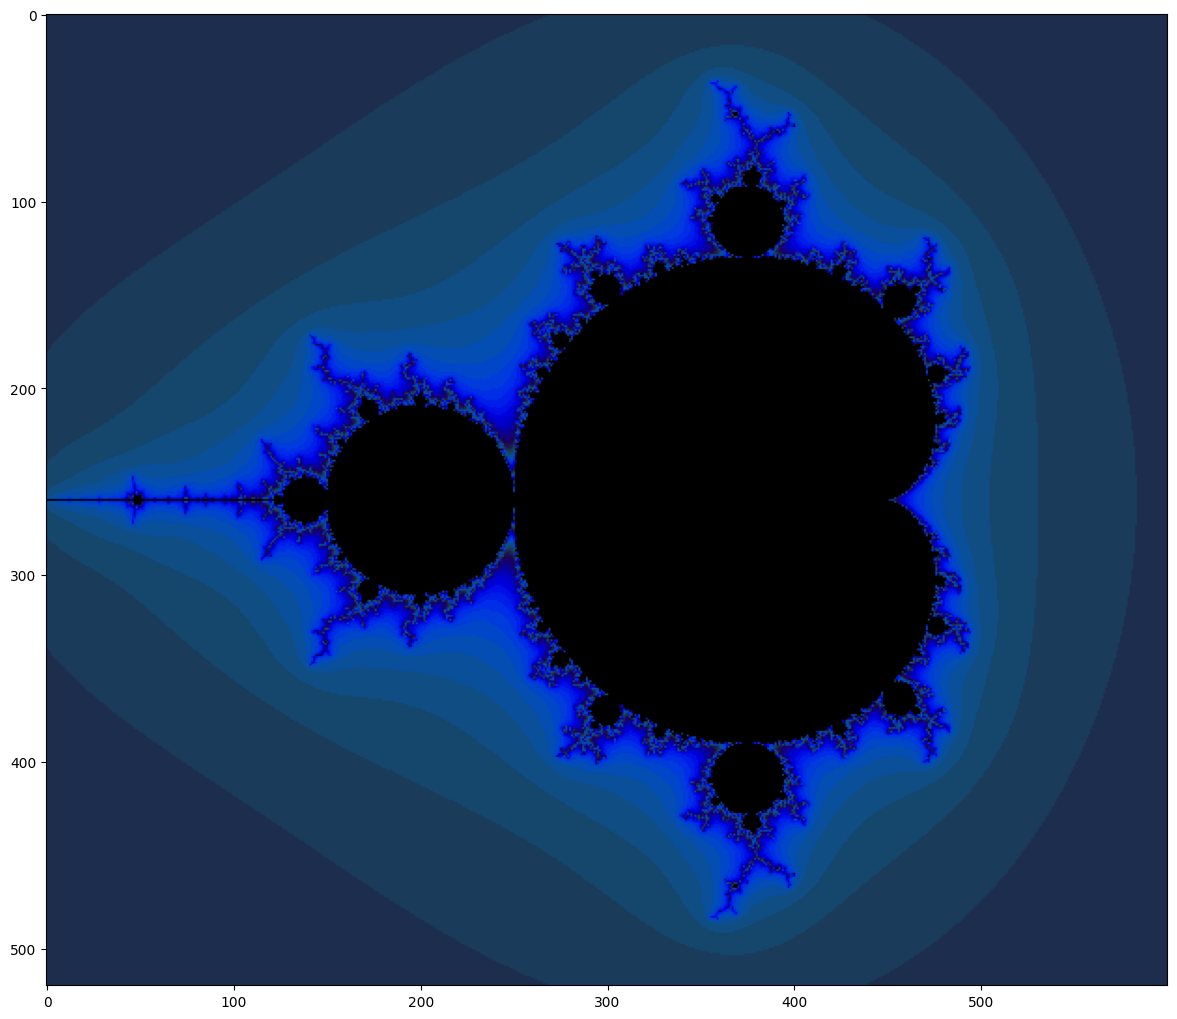

In [2]:
import torch
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y)
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
for i in range(200):
  #Compute the new values of z: z^2 + x
  zs_ = zs*zs + z
#Have we diverged with this new value?
  not_diverged = torch.abs(zs_) < 4
#Update variables to compute
  ns += not_diverged
  zs = zs_

#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
  30+50*np.sin(a_cyclic),
  155 - 80 * np.cos(a_cyclic)], 2)
  img[a == a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

<ipython-input-14-5fcbe6c46342>:39: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


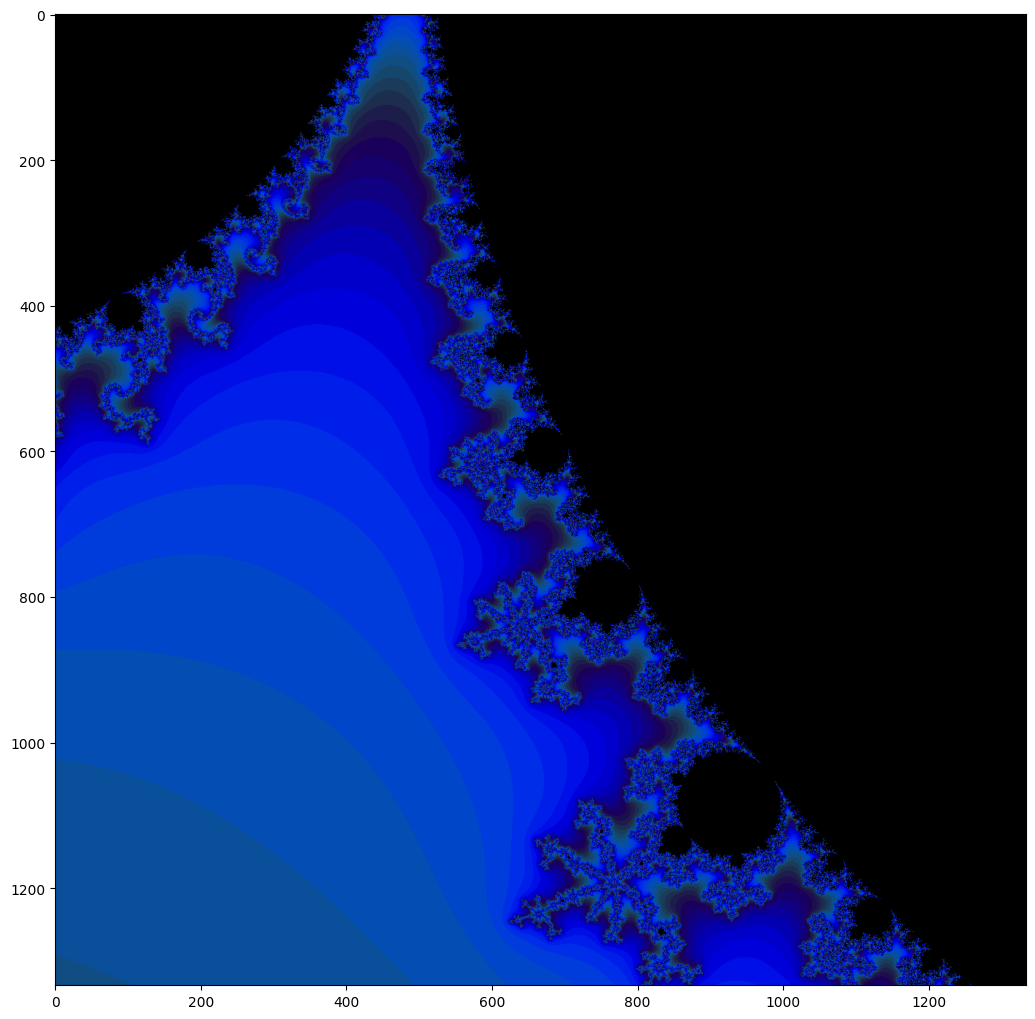

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

zoom_center_x, zoom_center_y = -0.7, 0.3
zoom_width, zoom_height = 0.2, 0.2
spacing = 0.0003

Y, X = np.mgrid[zoom_center_y - zoom_height:zoom_center_y + zoom_height:spacing,
                zoom_center_x - zoom_width:zoom_center_x + zoom_width:spacing]
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y)

zs = z.clone()
ns = torch.zeros_like(z)

z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

# 曼德博集合计算
for i in range(200):
    zs_ = zs * zs + z
    not_diverged = torch.abs(zs_) < 4
    ns += not_diverged
    zs = zs_

# 绘制结果
def processFractal(a):
    a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape) + [1])
    img = np.concatenate([10 + 20 * np.cos(a_cyclic),
                          30 + 50 * np.sin(a_cyclic),
                          155 - 80 * np.cos(a_cyclic)], 2)
    img[a == a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

fig = plt.figure(figsize=(16, 10))
plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()
